In [1]:
import pandas as pd #Dataframe, Series
import numpy as np #Paquetes de Scientific computing, Arrays
from matplotlib import pyplot as plt #Graficos

from sklearn.model_selection import train_test_split #Dividir Dataset en train y test
from sklearn.preprocessing import LabelEncoder #Pasar datos categoricos a numericos
from sklearn import preprocessing #Normalizacion de datos

#Imports dibujo arbol de decision
import graphviz
import StringIO as io
import pydotplus
import imageio

import time #Medir tiempo de entrenamiento

%matplotlib inline

## Dataset de conexiones KDD'99
Dataset: kddcup.data.corrected (Completo)
- Importacion del Dataset
- Ingenieria de atributos
- Visualización de datos y gráfico de 3 de los principales atributos
- Entrenamiento de un clasificador (Arbol de decision)
- Predecir objetivo usando el clasificador entrenado
- Comparacion de resultados con progresion lineal

IMPORTACION DEL DATASET Y DESCRIPCION

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

data = pd.read_csv('../dataset/kddcup.data.corrected', header=None, names = col_names)

In [3]:
data.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  4.898431e+06  4.898431e+06  4.898431e+06  4.898431e+06    4.898431e+06   
mean   4.834243e+01  1.834621e+03  1.093623e+03  5.716116e-06    6.487792e-04   
std    7.233298e+02  9.414311e+05  6.450123e+05  2.390833e-03    4.285434e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00   
25%    0.000000e+00  4.500000e+01  0.000000e+00  0.000000e+00    0.000000e+00   
50%    0.000000e+00  5.200000e+02  0.000000e+00  0.000000e+00    0.000000e+00   
75%    0.000000e+00  1.032000e+03  0.000000e+00  0.000000e+00    0.000000e+00   
max    5.832900e+04  1.379964e+09  1.309937e+09  1.000000e+00    3.000000e+00   

             urgent           hot  num_failed_logins     logged_in  \
count  4.898431e+06  4.898431e+06       4.898431e+06  4.898431e+06   
mean   7.961733e-06  1.243766e-02       3.205108e-05  1.435290e-01   
std    7.215084e-03  4.689782e-01       7.299408e-03  3.506116e-01   
min    0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00   
max    1.400000e+01  7.700000e+01       5.000000e+00  1.000000e+00   

       num_compromised            ...             dst_host_count  \
count     4.898431e+06            ...               4.898431e+06   
mean      8.088304e-03            ...               2.329811e+02   
std       3.856481e+00            ...               6.402094e+01   
min       0.000000e+00            ...               0.000000e+00   
25%       0.000000e+00            ...               2.550000e+02   
50%       0.000000e+00            ...               2.550000e+02   
75%       0.000000e+00            ...               2.550000e+02   
max       7.479000e+03            ...               2.550000e+02   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count        4.898431e+06            4.898431e+06            4.898431e+06   
mean         1.892142e+02            7.537132e-01            3.071111e-02   
std          1.059128e+02            4.111860e-01            1.085432e-01   
min          0.000000e+00            0.000000e+00            0.000000e+00   
25%          4.900000e+01            4.100000e-01            0.000000e+00   
50%          2.550000e+02            1.000000e+00            0.000000e+00   
75%          2.550000e+02            1.000000e+00            4.000000e-02   
max          2.550000e+02            1.000000e+00            1.000000e+00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 4.898431e+06                 4.898431e+06   
mean                  6.050520e-01                 6.464107e-03   
std                   4.809877e-01                 4.125978e-02   
min                   0.000000e+00                 0.000000e+00   
25%                   0.000000e+00                 0.000000e+00   
50%                   1.000000e+00                 0.000000e+00   
75%                   1.000000e+00                 0.000000e+00   
max                   1.000000e+00                 1.000000e+00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          4.898431e+06              4.898431e+06          4.898431e+06   
mean           1.780911e-01              1.778859e-01          5.792780e-02   
std            3.818382e-01              3.821774e-01          2.309428e-01   
min            0.000000e+00              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            0.000000e+00              0.000000e+00          0.000000e+00   
max            1.000000e+00              1.000000e+00          1.000000e+00   

       dst_host_srv_rerror_

In [4]:
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot   ...     dst_host_srv_count  \
0               0       0    0   ...                      0   
1               0       0    0   ...                      1   
2               0       0    0   ...                      2   
3               0       0    0   ...                      3   
4               0       0    0   ...                      4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                          0.0   
1                         1.00                          0.0   
2                         0.50                          0.0   
3                         0.33                          0.0   
4                         0.25                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate    label  
0                       0.0  normal.  
1                       0.0  normal.  
2                       0.0  normal.  
3                       0.0  normal.  
4                       0.0  normal.  

[5 rows x 42 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      in

## Histogramas (Normal / Ataque)
- Ejemplo Histogramas (La totalidad se muestra en el Anexo 1 para cada tipo de ataque)

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


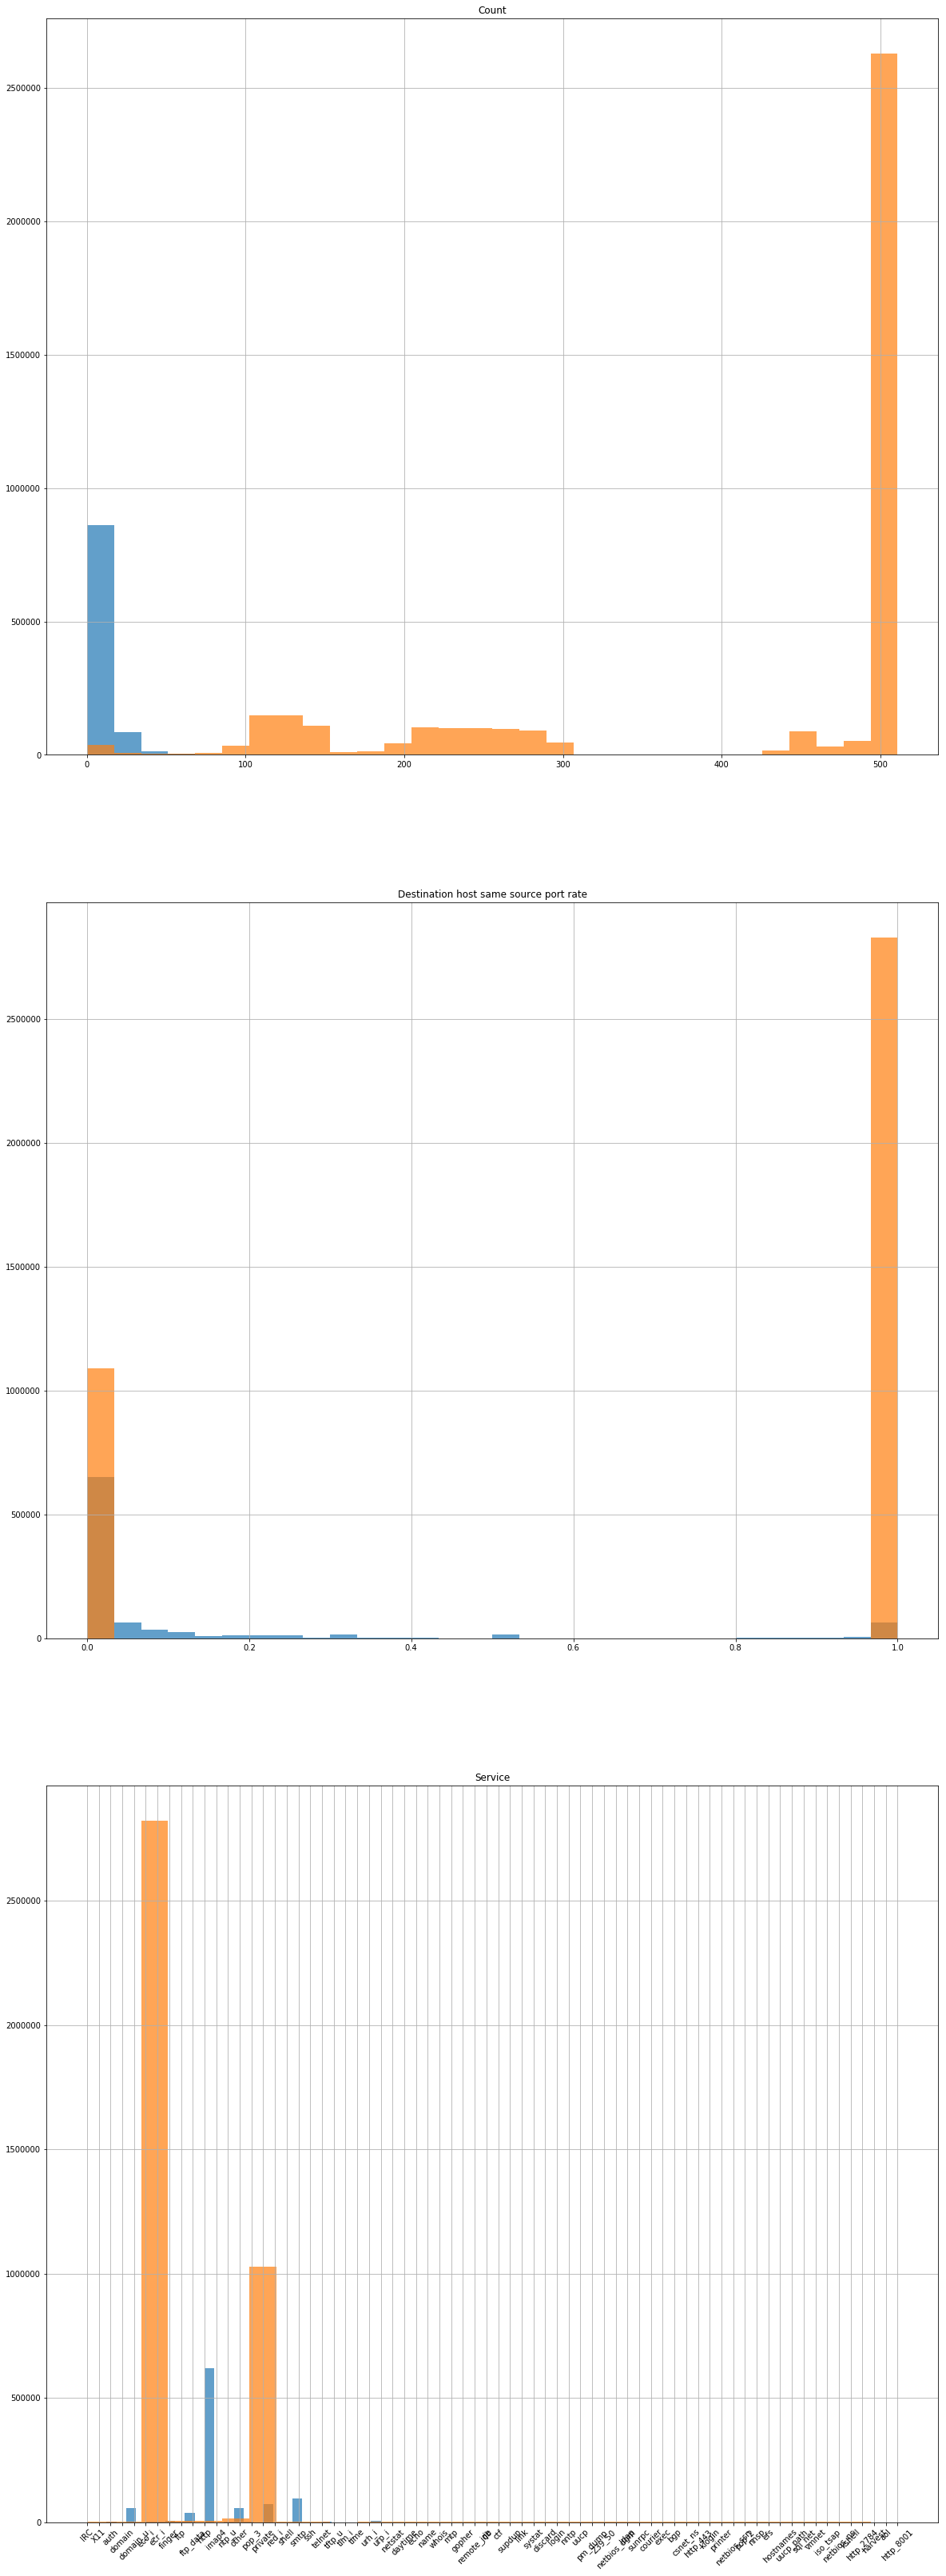

In [6]:
pos_count = data[data['label'] == 'normal.']['count']
neg_count = data[data['label'] != 'normal.']['count']

pos_dst_host_same_src_port_rate = data[data['label'] == 'normal.']['dst_host_same_src_port_rate']
neg_dst_host_same_src_port_rate = data[data['label'] != 'normal.']['dst_host_same_src_port_rate']

pos_service = data[data['label'] == 'normal.']['service']
neg_service = data[data['label'] != 'normal.']['service']

fig = plt.figure(figsize=(20,200))

#Count
ax1 = fig.add_subplot(10,1,1)
ax1.set_title("Count")
pos_count.hist(alpha = 0.7, bins = 30, label='positive')
ax2 = fig.add_subplot(10,1,1)
neg_count.hist(alpha = 0.7, bins = 30, label='negative')


#Destination host same source port rate
ax3 = fig.add_subplot(10,1,2)
ax3.set_title("Destination host same source port rate")
pos_dst_host_same_src_port_rate.hist(alpha = 0.7, bins = 30, label='positive')
ax4 = fig.add_subplot(10,1,2)
neg_dst_host_same_src_port_rate.hist(alpha = 0.7, bins = 30, label='negative')


#Service
ax5 = fig.add_subplot(10,1,3)
ax5.set_title("Service")
pos_service.hist(alpha = 0.7, bins = 30, label='positive')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)
ax6 = fig.add_subplot(10,1,3)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)
neg_service.hist(alpha = 0.7, bins = 30, label='negative')



# Tratamiento de datos antes de entrenar el modelo
- Llamar attack a todo lo que no sea "normal" (SUPRIMIDO)
- Transformar atributos categóricos en numéricos usando sklearn.preprocessing import LabelEncoder
- Escalado de los datos entre 0 y 1 (SUPRIMIDO)

In [7]:
#Llamar attack a los que no sean normales
#data.loc[data['label']!='normal.','label'] = 'attack.'

In [8]:
#TRANSFORMAR ATRIBUTOS categoricos EN NUMERO mediante from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

data_labels = data.label

data['protocol_type'] = number.fit_transform(data['protocol_type'].astype('str'))
data['service'] = number.fit_transform(data['service'].astype('str'))
data['flag'] = number.fit_transform(data['flag'].astype('str'))
data['label'] = number.fit_transform(data['label'].astype('str'))

In [9]:
#ESCALADO usando: from sklearn import preprocessing
#minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#data_minmax = minmax_scaler.fit_transform(data)
#data_minmax = pd.DataFrame(data_minmax, columns=col_names)

In [10]:
y = data.label
#X = data_minmax.drop('label', axis=1)
X = data.drop('label', axis=1)
X = X.drop('is_host_login', axis=1)
X = X.drop('num_outbound_cmds', axis=1)
X = X.drop('urgent', axis=1)
X = X.drop('su_attempted', axis=1)
X = X.drop('num_shells', axis=1)
X = X.drop('land', axis=1)
X = X.drop('root_shell', axis=1)
X = X.drop('num_failed_logins', axis=1)
X = X.drop('num_file_creations', axis=1)
X = X.drop('num_root', axis=1)
#X = X.drop('is_guest_login', axis=1)
#X = X.drop('num_access_files', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [12]:
print("Training size: {}; Test size: {}".format(len(X_train),len(X_test)))
X.shape

Training size: 4163666; Test size: 734765


(4898431, 31)

In [13]:
X_train.shape

(4163666, 31)

In [14]:
X_test.shape

(734765, 31)

## Arbol de decision

In [15]:
from sklearn import tree #Arboles de decision
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#El split marca la complejidad del arbol, si ponemos 2 quedaría lo mas complejo posible (over trained)
c = DecisionTreeClassifier(min_samples_split=10)

In [16]:
features =["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","wrong_fragment","hot",
    "logged_in","num_compromised",
    "num_access_files",
    "is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]


In [17]:
print time.strftime("%H:%M:%S") 
dt = c.fit(X_train, y_train)
print time.strftime("%H:%M:%S") 

23:31:05
23:31:49


In [18]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

In [ ]:
show_tree(dt, features, 'dec_tree_01.png')

In [ ]:
#Predicciones con la parte de dataset de test
y_pred = c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print "Accuracy using Decision Tree: ", score